In [149]:
import numpy as np

from lr_utils import *
import matplotlib.pyplot as plt
from helper_functions import plot_learning_curve
import pickle
import pandas as pd
from PIL import Image
import os


In [150]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [151]:
train_set_x = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

In [152]:
train_set_x = train_set_x / 255.0
test_set_x = test_set_x / 255.0

In [153]:
def train_model(force_retrain=False):
    if force_retrain:
        train_result = neural_network_logistic_model(train_set_x, train_set_y, test_set_x, test_set_y, learning_rate=0.005, num_iterations=300000, print_cost=True)
    else:
        try:
            with open('./train_results/train_history.txt', "rb") as file_pi:
                train_result = pickle.load(file_pi)
        except FileNotFoundError:
            train_result = neural_network_logistic_model(train_set_x, train_set_y, test_set_x, test_set_y, learning_rate=0.005, num_iterations=300000, print_cost=True)
    with open('./train_results/train_history.txt', 'wb') as file_pi:
        pickle.dump(result, file_pi)
    return train_result

result = train_model(force_retrain=False)

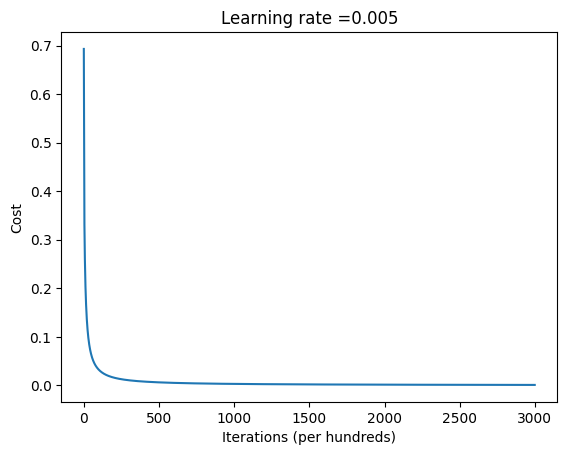

In [154]:
cost_history = result['cost_history']
plot_learning_curve(cost_history, result["learning_rate"])

In [186]:
my_images = os.listdir("images/")

image_prediction = np.array([
    my_images,
    np.zeros(len(my_images), dtype=np.int8),
]).T

image_frame = pd.DataFrame(image_prediction, columns=['Image Name', "Prediction"])
image_frame

,Image Name,Prediction
0,dog_picture.jpeg,0
1,cat_picture2.jpeg,0
2,cat_picture.jpeg,0
3,tiger_picture.jpeg,0
4,leopard_picture.jpeg,0


In [193]:
def predict_image(w, b, image):
    image_names = image["Image Name"]
    image_path = image_names.apply(lambda x: "images/" + x)
    convert_image = image_path.map(open_image)
    image["Prediction"] = convert_image.map(lambda x: int(np.squeeze(predict_w_b(w, b, x))))
    return image

def open_image(image_path):
    image = np.array(Image.open(image_path).resize((64, 64)))
    image = image / 255.
    image = image.reshape((1, 64 * 64 * 3)).T
    return image


In [194]:
predict_image(result["w"], result["b"], image_frame)

,Image Name,Prediction
0,dog_picture.jpeg,0
1,cat_picture2.jpeg,1
2,cat_picture.jpeg,1
3,tiger_picture.jpeg,0
4,leopard_picture.jpeg,0
